<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you are familiar with the Gradient Descent method, I'd like to draw your attention to a faster, second order method, called Newton/ Newton-Raphson

Now, orginially Newton-Raphson was defined as a root finding method

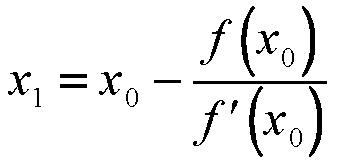

When looked into from an optimization standpoint, we could turn it into a local minima search algorithm if we were to change the function numerator with it's first order derivative and it's derivative denominator with the function's second order derivative. This makes the method a second order Taylor approximation, which also makes it faster then GD (we even expect to get convergence in one step when the function is quadratic), but this will also imply the existence and inversability of the Hessian matrix (second order derivatives) so it usually has not as much adaptability as Steepest descent does.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math, Latex
import warnings
warnings.filterwarnings("ignore") # Don't try this at home, kids !


<IPython.core.display.Math object>

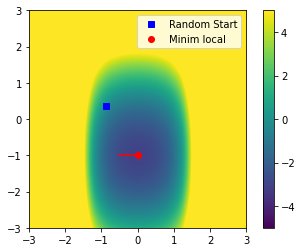

In [2]:
def fcn(x, y):
    x, y = np.meshgrid(x, y)
    z = np.exp(x ** 2) + y ** 2 - 3 + 2 * y
    return z

display(Math(f' f(x,y) = exp(x^2) + y^2 + 2y - 3 '))

x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = fcn(x, y)

sx, sy = sym.symbols('sx,sy')

sZ = sym.exp(sx ** 2) + sy ** 2 - 3 + 2 * sy

df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

hess = sym.lambdify((sx,sy), sym.hessian(sZ, [sx,sy]), 'sympy')

localmin = np.random.randn(2)
statpnt = localmin[:]

training_epochs = 1000
# Using only the first Hessian computation would make it the "Modified Newton method", which has both advantages and disadvantages
# Hess = np.array(hess(localmin.item(0), localmin.item(1)))
# Hss = np.vstack(Hess[:]).astype(np.float)
# invHess = np.linalg.inv(Hss)
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([df_x(localmin.item(0), localmin.item(1)),
                     df_y(localmin.item(0), localmin.item(1))
                     ])
    Hess = np.array(hess(localmin.item(0), localmin.item(1)))
    Hss = np.vstack(Hess[:]).astype(np.float)
    invHess = np.linalg.inv(Hss)

    localmin = localmin - np.matmul(invHess, grad)
    trajectory[i, :] = localmin


plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(statpnt[0], statpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['Random Start', 'Minim local'])
plt.colorbar()
plt.show()

As you can see, the convergence is so fast, that the tajectory looked like it skipped steps.